In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import logging 
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s',
                    filename='model.log',
                    filemode='w')
#importing scikit learn libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
url = 'https://raw.githubusercontent.com/preet-pandey/Customer_churn_prediction_model/refs/heads/main/Churn_Modelling.csv'
df=pd.read_csv(url)
df.sample(frac=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1678,1679,15569178,Kharlamov,570,France,Female,18.0,4,82767.42,1,1.0,0.0,71811.90,0
8578,8579,15707011,Morrison,495,France,Male,47.0,10,137682.68,1,1.0,0.0,71071.47,0
7398,7399,15577771,Akabueze,453,Germany,Female,40.0,1,111524.49,1,1.0,1.0,120373.84,1
4277,4278,15797910,Zetticci,775,Germany,Male,51.0,2,123783.25,1,1.0,1.0,134901.57,0
9427,9428,15584812,Overby,693,Spain,Female,39.0,0,0.00,2,0.0,0.0,81901.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,6993,15808175,Castiglione,557,France,Female,39.0,7,49572.73,1,1.0,0.0,115287.99,1
9247,9248,15650244,Bezrukov,786,Spain,Male,29.0,7,80895.44,2,1.0,0.0,64945.57,0
2605,2606,15620398,Mitchell,635,Spain,Female,34.0,5,98683.47,2,1.0,0.0,15733.19,0
454,455,15726631,Hilton,758,France,Female,39.0,6,127357.76,1,0.0,1.0,56577.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


<Axes: >

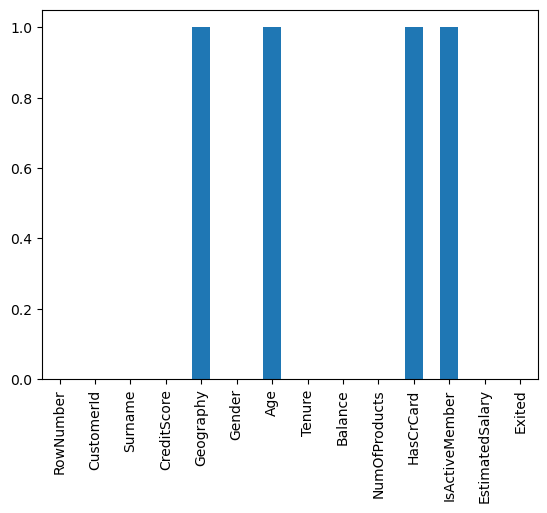

In [5]:
df.isna().sum().plot(kind='bar')

In [6]:
#imputing missing value
df['IsActiveMember'].fillna(df['IsActiveMember'].median(),inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Geography'].fillna('France',inplace=True)

C:\Users\preet\AppData\Local\Temp\ipykernel_14140\1501409357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IsActiveMember'].fillna(df['IsActiveMember'].median(),inplace=True)
C:\Users\preet\AppData\Local\Temp\ipykernel_14140\1501409357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Axes: >

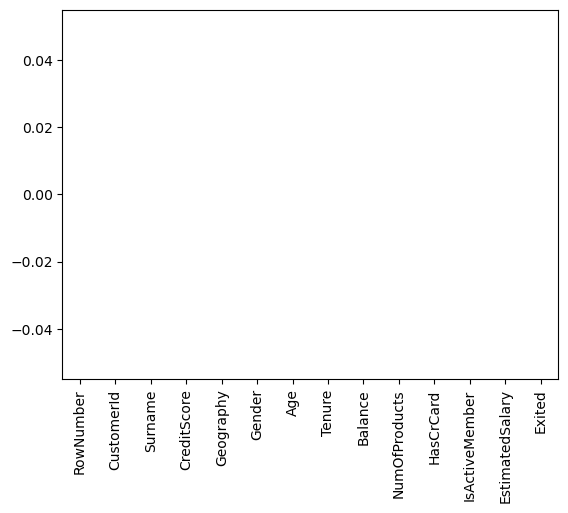

In [7]:
df.isna().sum().plot(kind='bar')

In [8]:
numerical_cols = df.select_dtypes(include=['int64','float64'])
categorical_columns = df.select_dtypes(include='object')

In [9]:
#descriptive stats
from collections import OrderedDict

stats = []
for i in numerical_cols.columns:
    numerical_stats = OrderedDict({
        'feature': i,
        'mean': numerical_cols[i].mean(),
        'median': df[i].median(),
        'mode': df[i].mode()[0],
        'min': df[i].min(),
        'max': df[i].max(),
        'std': df[i].std(),
        'var': df[i].var(),
        'skew': df[i].skew(),
        'kurtosis': df[i].kurtosis(),
        'range': df[i].max() - df[i].min(),
        'q1': df[i].quantile(0.25),
        'q3': df[i].quantile(0.75),
        'iqr': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report


,feature,mean,median,mode,min,max,std,var,skew,kurtosis,range,q1,q3,iqr
0,RowNumber,5.001500e+03,5001.50,9999.00,1.00,10000.00,2887.472338,8.337497e+06,-8.301804e-07,-1.200001,9999.00,2501.25,7.501750e+03,5000.5000
1,CustomerId,1.569093e+07,15690732.00,15628319.00,15565701.00,15815690.00,71931.769345,5.174179e+09,1.379949e-03,-1.195972,249989.00,15628524.75,1.575323e+07,124700.7500
2,CreditScore,6.505551e+02,652.00,850.00,350.00,850.00,96.661615,9.343468e+03,-7.187787e-02,-0.426340,500.00,584.00,7.180000e+02,134.0000
3,Age,3.892212e+01,37.00,37.00,18.00,92.00,10.486693,1.099707e+02,1.011392e+00,1.396161,74.00,32.00,4.400000e+01,12.0000
4,Tenure,5.012498e+00,5.00,2.00,0.00,10.00,2.891973,8.363507e+00,1.126740e-02,-1.165051,10.00,3.00,7.000000e+00,4.0000
5,Balance,7.649111e+04,97198.54,0.00,0.00,250898.09,62393.474144,3.892946e+09,-1.412948e-01,-1.489231,250898.09,0.00,1.276478e+05,127647.8400
6,NumOfProducts,1.530194e+00,1.00,1.00,1.00,4.00,0.581639,3.383043e-01,7.454846e-01,0.582777,3.00,1.00,2.000000e+00,1.0000
7,HasCrCard,7.055589e-01,1.00,1.00,0.00,1.00,0.455814,2.077663e-01,-9.021225e-01,-1.186412,1.00,0.00,1.000000e+00,1.0000
8,IsActiveMember,5.149970e-01,1.00,1.00,0.00,1.00,0.499800,2.498001e-01,-6.002401e-02,-1.996796,1.00,0.00,1.000000e+00,1.0000
9,EstimatedSalary,1.000833e+05,100185.24,24924.92,11.58,199992.48,57508.117802,3.307184e+09,2.320765e-03,-1.181446,199980.90,50983.75,1.493837e+05,98399.9025


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])


In [11]:
# step 1 : split the dataset into X and Y 
X = df.drop(columns = ['RowNumber','CustomerId','Surname','Exited'],axis = 1)
y = df['Exited']


# step 2 : split the dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,
random_state = 42)

#step 3 : Balancing the target  column
from imblearn.over_sampling import SMOTE,ADASYN


sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

#step 4 : scaling techniques
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_pred_RF,y_test)*100)

The Model Accuracy for the Random Forest Classifier:  84.33855381539487


In [13]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Classifier:  85.20493168943686


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400,500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2,0.5],
    'max_depth': [3, 4, 5, 6, 7,],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.5, 1, 1.5]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict and evaluate
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\preet\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:40:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.883800963081862
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2401
           1       0.63      0.55      0.59       600

    accuracy                           0.85      3001
   macro avg       0.76      0.73      0.75      3001
weighted avg       0.84      0.85      0.84      3001



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500,600],
    'max_depth': [None, 10, 20, 30, 40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit model
random_search.fit(X_train, y_train)

# Results
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Prediction & Evaluation
# y_pred = random_search.predict(X_test)
# print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages

Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score: 0.8839798499853618
